In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import plotly.graph_objects as go

<font size="15">MAFO</font>


In [11]:
df1 = pd.read_csv('new_File1.csv')
df2 = pd.read_csv('new_File2.csv')
df1

,Age,Gender,School,Start Date,End Date,Internship Goals,School d'pt,Stack,Highest Level of Education Completed
0,22,Male,NAHPI,2025-03-01,2025-08-30,Fulfill academic requirements \r\nImprove skil...,COMPUTER ENGINEERING,Data science,ADVANCED LEVEL
1,19,Male,COLTECH,2025-02-18,2025-03-22,1: gain practical experience in network securi...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
2,21,Male,NAHPI,2025-03-19,2025-09-19,Gain development skill\r\nnetworking\r\ngain p...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
3,19,Male,COLTECH,2025-02-18,2025-02-18,These are some of my goals for the internship ...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
4,20,Male,COLTECH,2025-02-21,2025-03-22,"1. Learning the basics on html, css and javasc...",COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
5,20,Male,NAHPI,2025-02-18,2025-08-29,- To build my software development skills\r\n-...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
6,20,Male,COLTECH,2025-02-12,2025-03-31,-get better at coding \r\n-be so good that I c...,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
7,19,Female,COLTECH,2025-02-18,2025-03-31,User did not input anything,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
8,22,Female,NAHPI,2025-03-18,2025-05-18,To know how to program using python \r\nTo do ...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL
9,21,Female,NAHPI,2025-02-18,2025-05-18,Learn how to code in Python\r\nAcquire skills ...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL


In [12]:
luxury_colors = [
    '#03045e', 
    '#023e8a',  
    '#0077b6', 
    '#0096c7',  
    '#00b4d8',  
    '#48cae4',  
    '#90e0ef',  
    '#ade8f4', 
    '#caf0f8', 
    '#fefae0'  
]
luxury_colors2 = [
    '#2C3E50',  # Deep Navy Blue
    '#D4AF37',  # Metallic Gold
    '#8E44AD',  # Royal Purple
    '#C0392B',  # Burgundy Red
    '#B76E79',  # Rose Gold
    '#34495E',  # Charcoal Gray
    '#CFB53B',  # Old Gold
    '#702963',  # Amethyst
    '#E5C687',  # Champagne Gold
    '#800020'   # Deep Burgundy
]

luxury_cmap = sns.color_palette([
    '#FFFFFF',  # White/Light start
    '#E5C687',  # Champagne
    '#D4AF37',  # Gold
    '#2C3E50',  # Deep Navy Blue (end)
], as_cmap=True)

In [13]:

df1["Start Date"] = pd.to_datetime(df1["Start Date"], errors="coerce")
df1["End Date"] = pd.to_datetime(df1["End Date"], errors="coerce")

df1["Internship_Duration"] = (df1["End Date"] - df1["Start Date"]).dt.days
df1

,Age,Gender,School,Start Date,End Date,Internship Goals,School d'pt,Stack,Highest Level of Education Completed,Internship_Duration
0,22,Male,NAHPI,2025-03-01,2025-08-30,Fulfill academic requirements \r\nImprove skil...,COMPUTER ENGINEERING,Data science,ADVANCED LEVEL,182
1,19,Male,COLTECH,2025-02-18,2025-03-22,1: gain practical experience in network securi...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL,32
2,21,Male,NAHPI,2025-03-19,2025-09-19,Gain development skill\r\nnetworking\r\ngain p...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL,184
3,19,Male,COLTECH,2025-02-18,2025-02-18,These are some of my goals for the internship ...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL,0
4,20,Male,COLTECH,2025-02-21,2025-03-22,"1. Learning the basics on html, css and javasc...",COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,29
5,20,Male,NAHPI,2025-02-18,2025-08-29,- To build my software development skills\r\n-...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL,192
6,20,Male,COLTECH,2025-02-12,2025-03-31,-get better at coding \r\n-be so good that I c...,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,47
7,19,Female,COLTECH,2025-02-18,2025-03-31,User did not input anything,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,41
8,22,Female,NAHPI,2025-03-18,2025-05-18,To know how to program using python \r\nTo do ...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL,61
9,21,Female,NAHPI,2025-02-18,2025-05-18,Learn how to code in Python\r\nAcquire skills ...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL,89


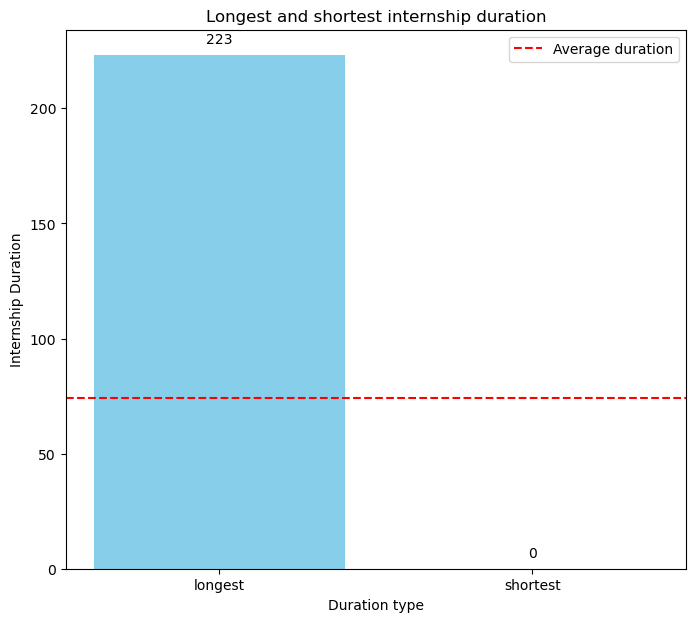

In [14]:
longest = df1['Internship_Duration'].max()
shortest = df1['Internship_Duration'].min()

durations = [longest, shortest]
labels = ['longest' , 'shortest']
colors = ['skyblue', 'salmon']

plt.figure(figsize=(8, 7))
plt.bar(labels, durations, color=colors)

plt.title('Longest and shortest internship duration')
plt.xlabel('Duration type')
plt.ylabel('Internship Duration')

for i, value in enumerate(durations):
    plt.text(i, value + 5, str(value), ha='center')

#mean internship duration
avg_duration = df1['Internship_Duration'].mean()
plt.axhline(avg_duration, color = 'red', linestyle = '--', label = 'Average duration')
plt.legend()

plt.show()

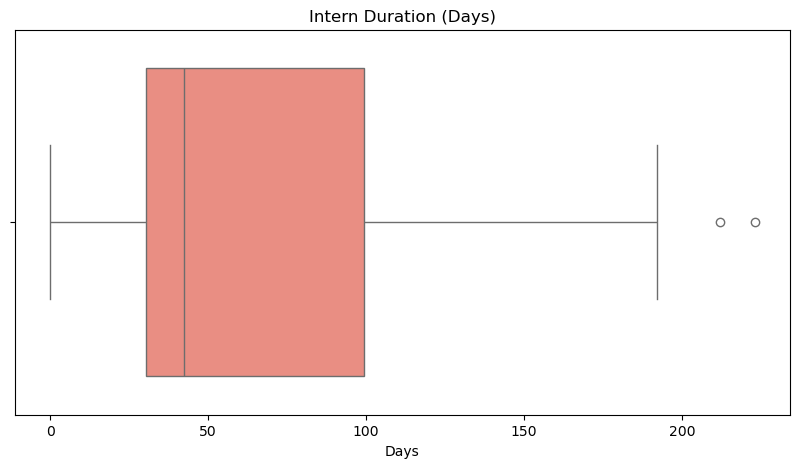

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1['Internship_Duration'], color='salmon')
plt.title('Intern Duration (Days)')
plt.xlabel('Days')
plt.show()

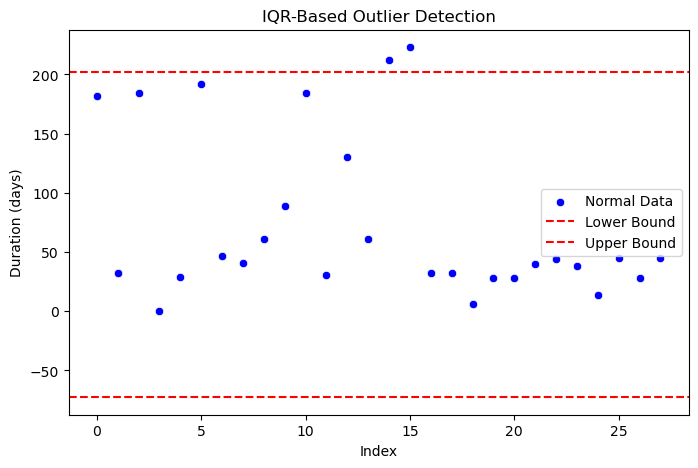

In [16]:
Q1 = df1['Internship_Duration'].quantile(0.25)
Q3 = df1['Internship_Duration'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR 

outliers = df1[(df1['Internship_Duration'] < lower_bound) | (df1['Internship_Duration'] > upper_bound)]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df1.index, y=df1['Internship_Duration'], color = 'blue', label = 'Normal Data')
plt.axhline(lower_bound, color = 'red', linestyle = '--', label = 'Lower Bound')
plt.axhline(upper_bound, color = 'red', linestyle = '--', label = 'Upper Bound')
plt.title('IQR-Based Outlier Detection')
plt.xlabel('Index')
plt.ylabel('Duration (days)')
plt.legend()
plt.show()


<font size = '15'>GAIOUS

C:\Users\Dell\AppData\Local\Temp\ipykernel_7640\3802950083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_7640\3802950083.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


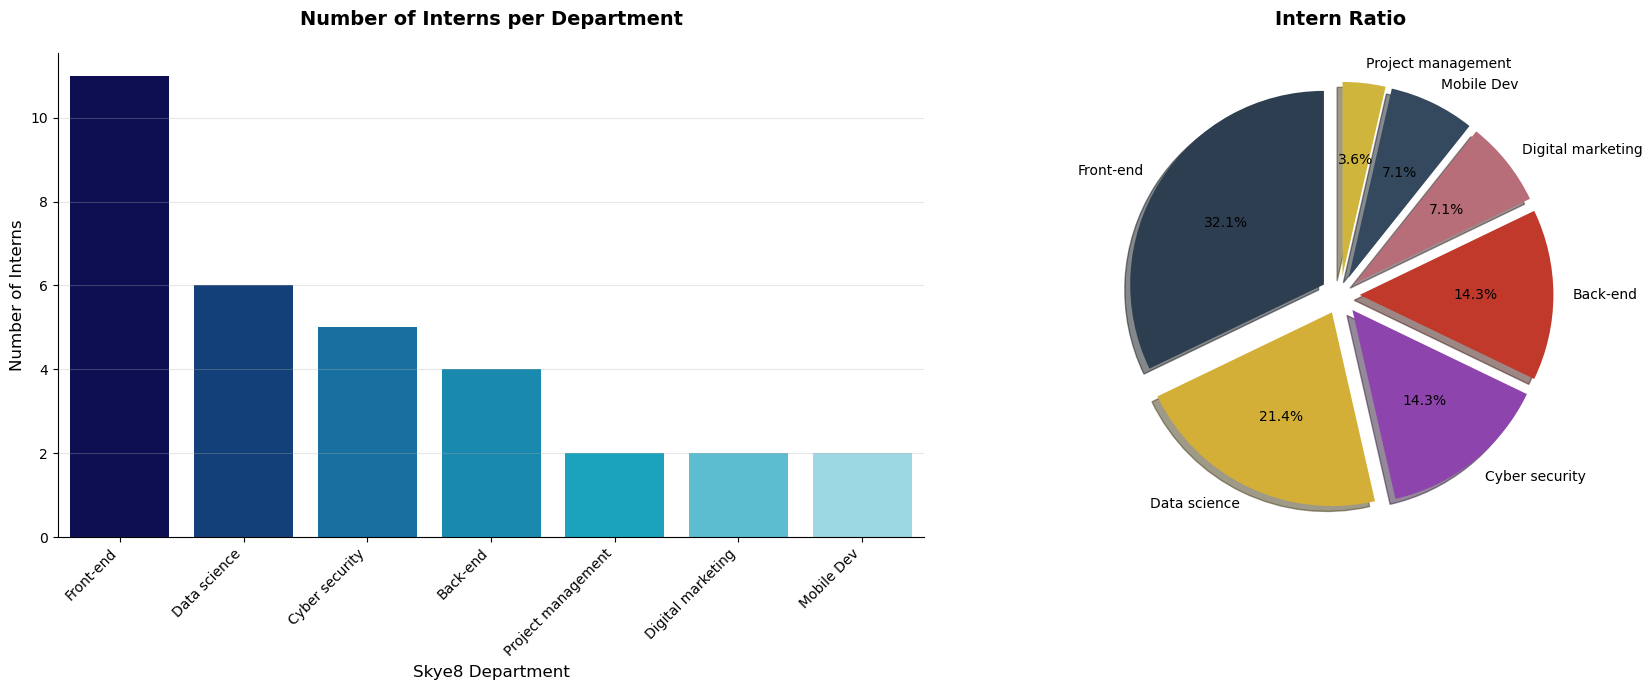

In [17]:

dept_counts = df2["department"].value_counts()
value_counts = df1["Stack"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.barplot(
    x=dept_counts.index, 
    y=dept_counts.values, 
    palette=luxury_colors[:len(dept_counts)], 
    ax=axes[0]
)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel("Skye8 Department", fontsize=12)
axes[0].set_ylabel("Number of Interns", fontsize=12)
axes[0].set_title("Number of Interns per Department", fontsize=14, pad=20, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)


wedges, texts, autotexts = axes[1].pie(
    value_counts, 
    labels=value_counts.index, 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=90, 
    explode=[0.1] * len(value_counts), 
    colors=luxury_colors2[:len(value_counts)]
)
axes[1].set_title("Intern Ratio", pad=20, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


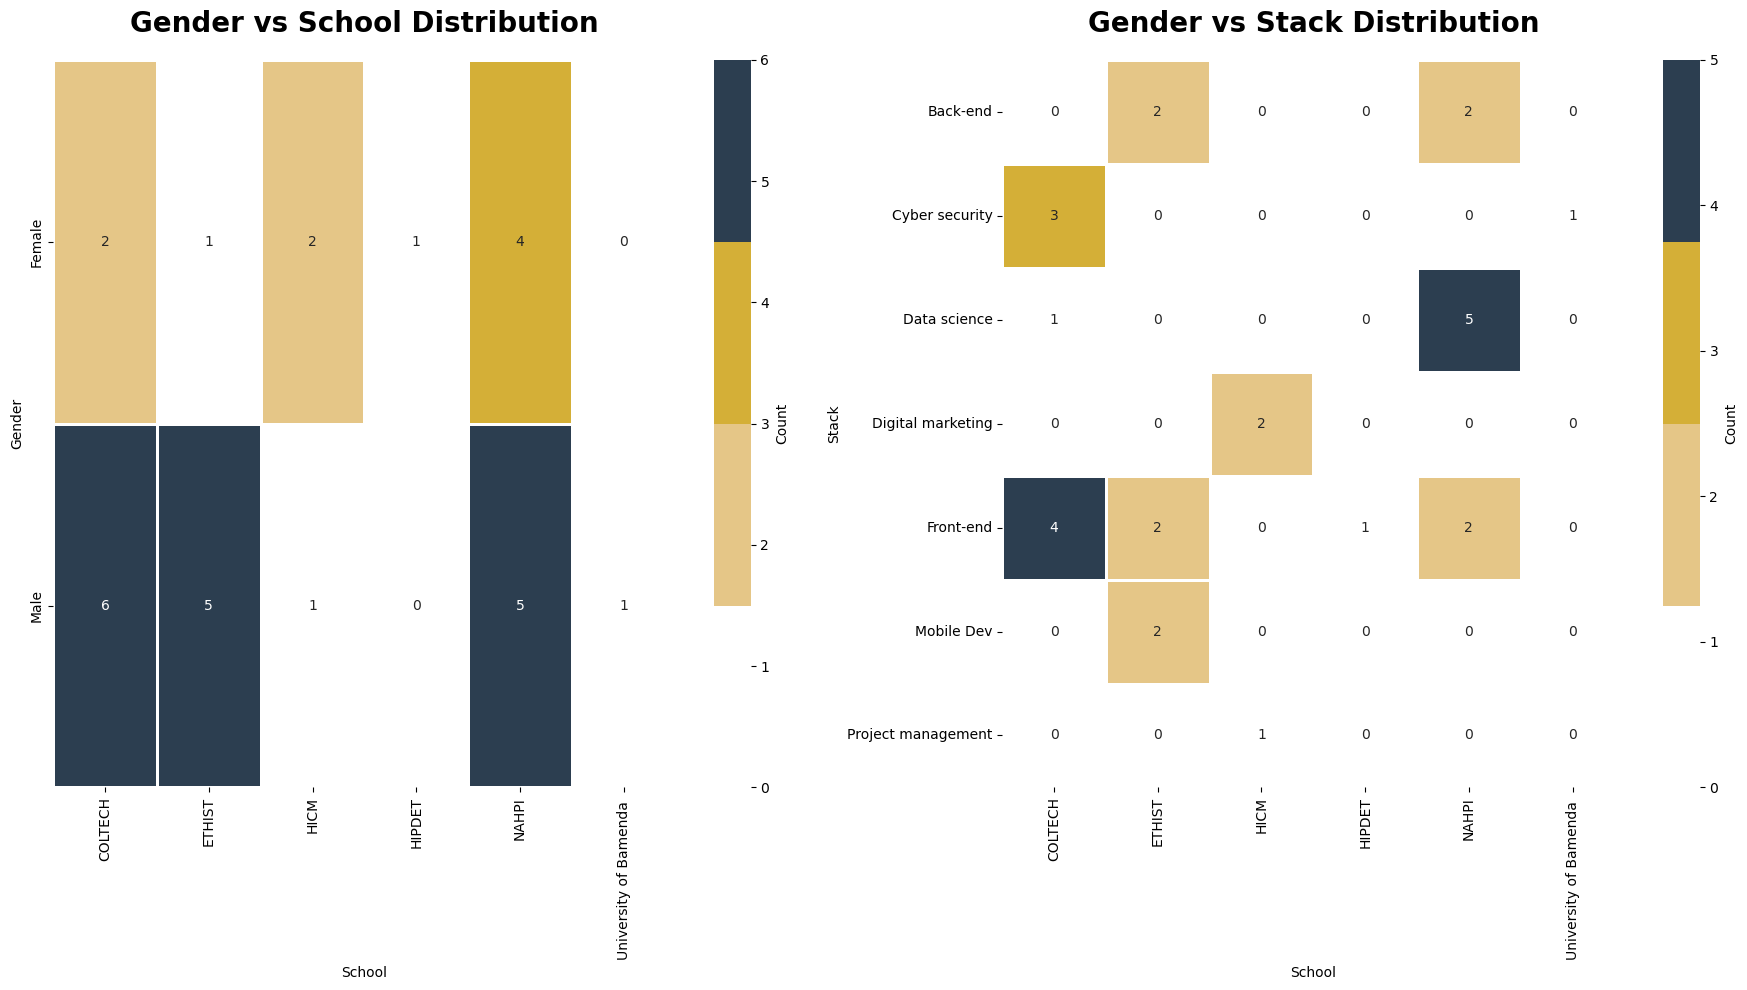

In [18]:
dept_mapping1 = df2.groupby([df1["Gender"], df1["School"]]).size().unstack(fill_value=0)

dept_mapping2 = df2.groupby([df1["Stack"], df1["School"]]).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

sns.heatmap(dept_mapping1, 
            cmap=luxury_cmap,
            annot=True, 
            fmt="d",
            cbar_kws={'label': 'Count'},
            linewidths=1, 
            linecolor='white',
            ax=axes[0])  

axes[0].set_title("Gender vs School Distribution", 
                  pad=20, 
                  fontsize=20, 
                  fontweight='bold')

sns.heatmap(dept_mapping2, 
            cmap=luxury_cmap,
            annot=True, 
            fmt="d",
            cbar_kws={'label': 'Count'},
            linewidths=1, 
            linecolor='white',
            ax=axes[1])  

axes[1].set_title("Gender vs Stack Distribution", 
                  pad=20, 
                  fontsize=20, 
                  fontweight='bold')
plt.tight_layout()
plt.show()


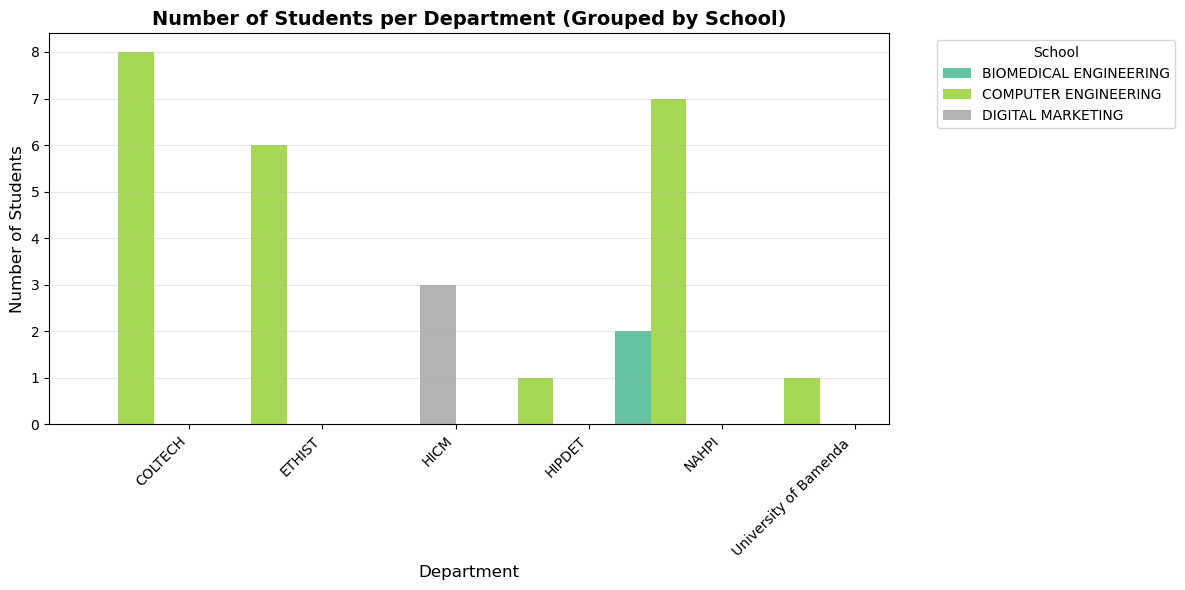

In [19]:
df_grouped = df1.groupby(["School", "School d'pt"]).size().unstack(fill_value=0)

ax = df_grouped.plot(kind='bar', figsize=(12, 6), width=0.8, position=1, cmap='Set2')

plt.title('Number of Students per Department (Grouped by School)', fontsize=14, fontweight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='School', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.grid(axis='y', alpha=0.3)


plt.tight_layout()


plt.show()


In [20]:

df1["Start Date"] = pd.to_datetime(df1["Start Date"])


start_counts = df1.groupby("Start Date").size().reset_index(name="Intern_Count")


same_start_dates = start_counts[start_counts["Intern_Count"] >= 1]
print(same_start_dates)





df1["End Date"] = pd.to_datetime(df1["End Date"])


end_counts = df1.groupby("End Date").size().reset_index(name="Intern_Count")


same_end_dates = end_counts[end_counts["Intern_Count"] >= 1]
print(same_end_dates)


   Start Date  Intern_Count
0  2024-11-19             1
1  2025-02-10             1
2  2025-02-11             1
3  2025-02-12             1
4  2025-02-15             3
5  2025-02-18             9
6  2025-02-19             2
7  2025-02-20             1
8  2025-02-21             1
9  2025-02-25             2
10 2025-03-01             2
11 2025-03-18             1
12 2025-03-19             2
13 2025-11-03             1
     End Date  Intern_Count
0  2025-02-18             1
1  2025-03-01             1
2  2025-03-15             1
3  2025-03-18             2
4  2025-03-22             3
5  2025-03-27             2
6  2025-03-28             2
7  2025-03-29             2
8  2025-03-31             3
9  2025-04-01             1
10 2025-05-01             1
11 2025-05-18             2
12 2025-08-29             1
13 2025-08-30             1
14 2025-09-19             2
15 2025-09-20             1
16 2025-09-30             1
17 2025-11-09             1


C:\Users\Dell\AppData\Local\Temp\ipykernel_7640\2692995171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_7640\2692995171.py:5: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_7640\2692995171.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_7640\2692995171.py:18: UserWarning: 
The palette list has fewer values (10) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


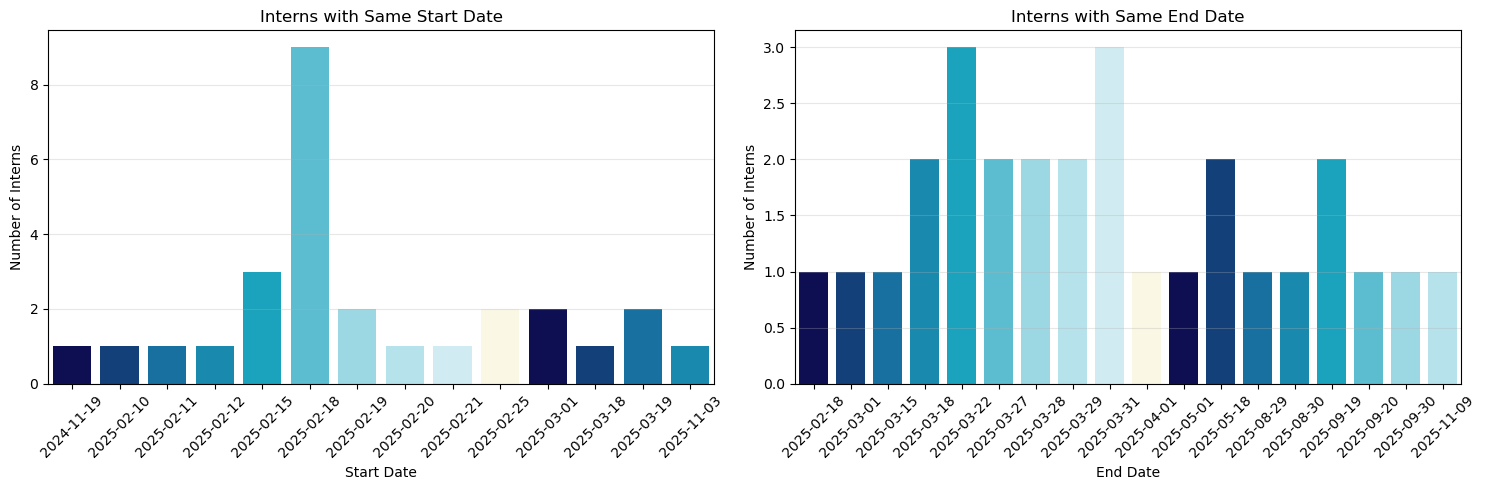

In [21]:

plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
sns.barplot(
    data=same_start_dates,
    x='Start Date',
    y='Intern_Count',
    palette=luxury_colors
)
plt.xticks(rotation=45)
plt.xlabel("Start Date")
plt.ylabel("Number of Interns")
plt.title("Interns with Same Start Date")
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
sns.barplot(
    data=same_end_dates,
    x='End Date',
    y='Intern_Count',
    palette=luxury_colors
)
plt.grid(axis='y', alpha=0.3)

plt.xticks(rotation=45)
plt.xlabel("End Date")
plt.ylabel("Number of Interns")
plt.title("Interns with Same End Date")


plt.tight_layout()
plt.show()



In [22]:
grp_dpt = df1['Age'].groupby(df2['department'])
dept_mean =grp_dpt.mean()
dept_mean



department
Back-end              19.666667
Cyber security        20.500000
Data science          20.000000
Digital marketing     22.000000
Front-end             20.333333
Mobile Dev            19.000000
Project management    26.000000
Name: Age, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_7640\1600935168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= dept_mean.index, y=dept_mean.values, palette=luxury_colors)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7640\1600935168.py:2: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot( x= dept_mean.index, y=dept_mean.values, palette=luxury_colors)


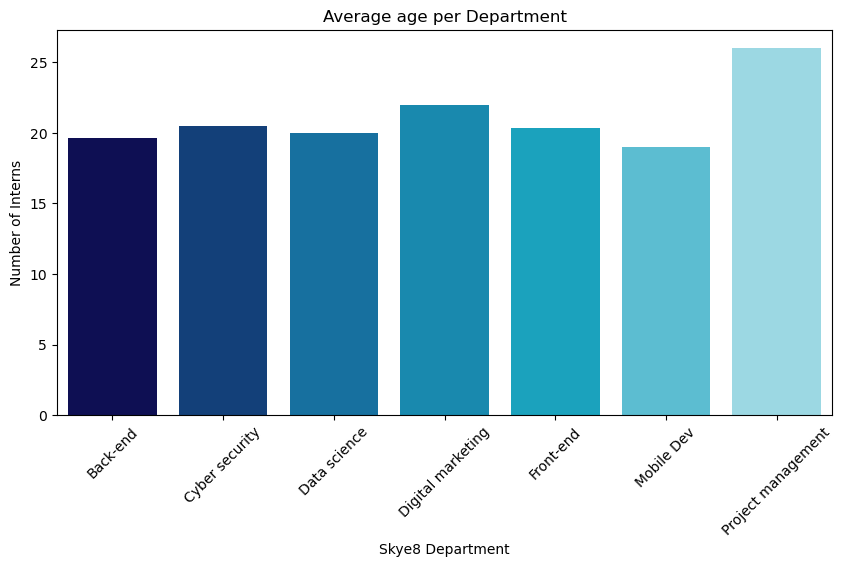

In [23]:
plt.figure(figsize=(10,5))
sns.barplot( x= dept_mean.index, y=dept_mean.values, palette=luxury_colors)
plt.xticks(rotation=45)
plt.xlabel("Skye8 Department")
plt.ylabel("Number of Interns")
plt.title("Average age per Department")
plt.show()

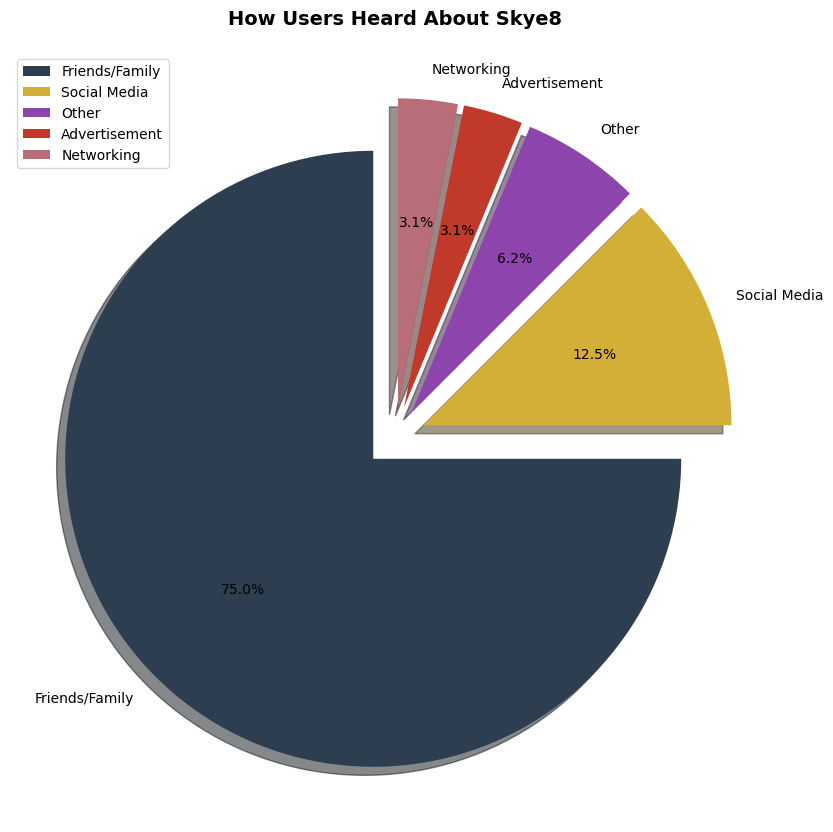

In [24]:
value_counts = df2['abt_skye8'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90,
        explode=[0.1] * len(value_counts),
        colors=luxury_colors2[:len(value_counts)])  

plt.title('How Users Heard About Skye8', pad=20, fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.show()



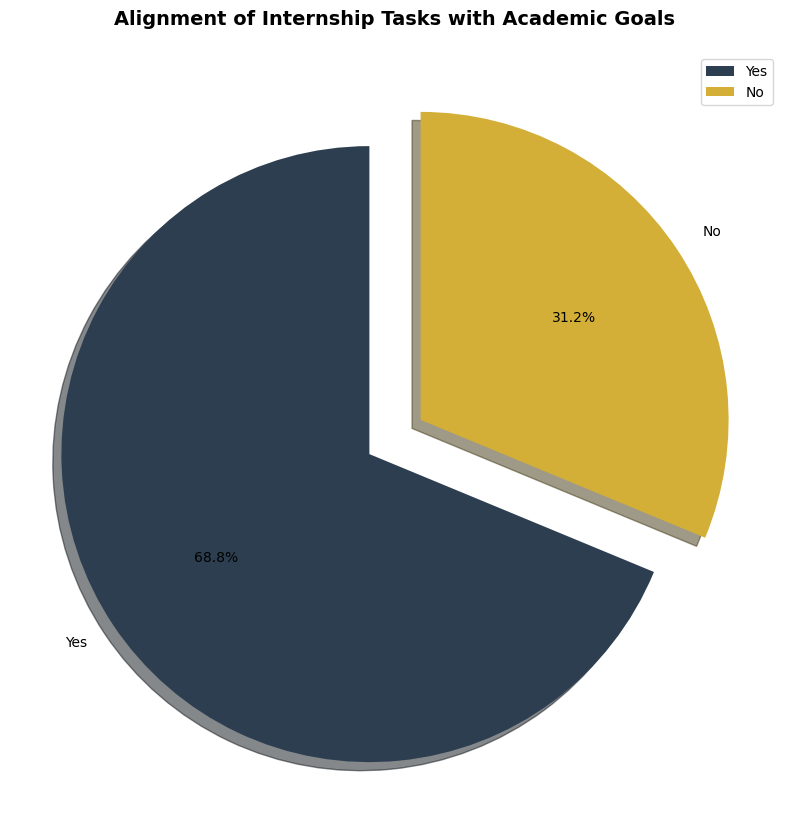

In [25]:
value_counts = df2['is_first_time_at_skye8'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90,
        explode=[0.1] * len(value_counts),
        colors=luxury_colors2[:len(value_counts)])  

plt.title('Alignment of Internship Tasks with Academic Goals', pad=20, fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.show()



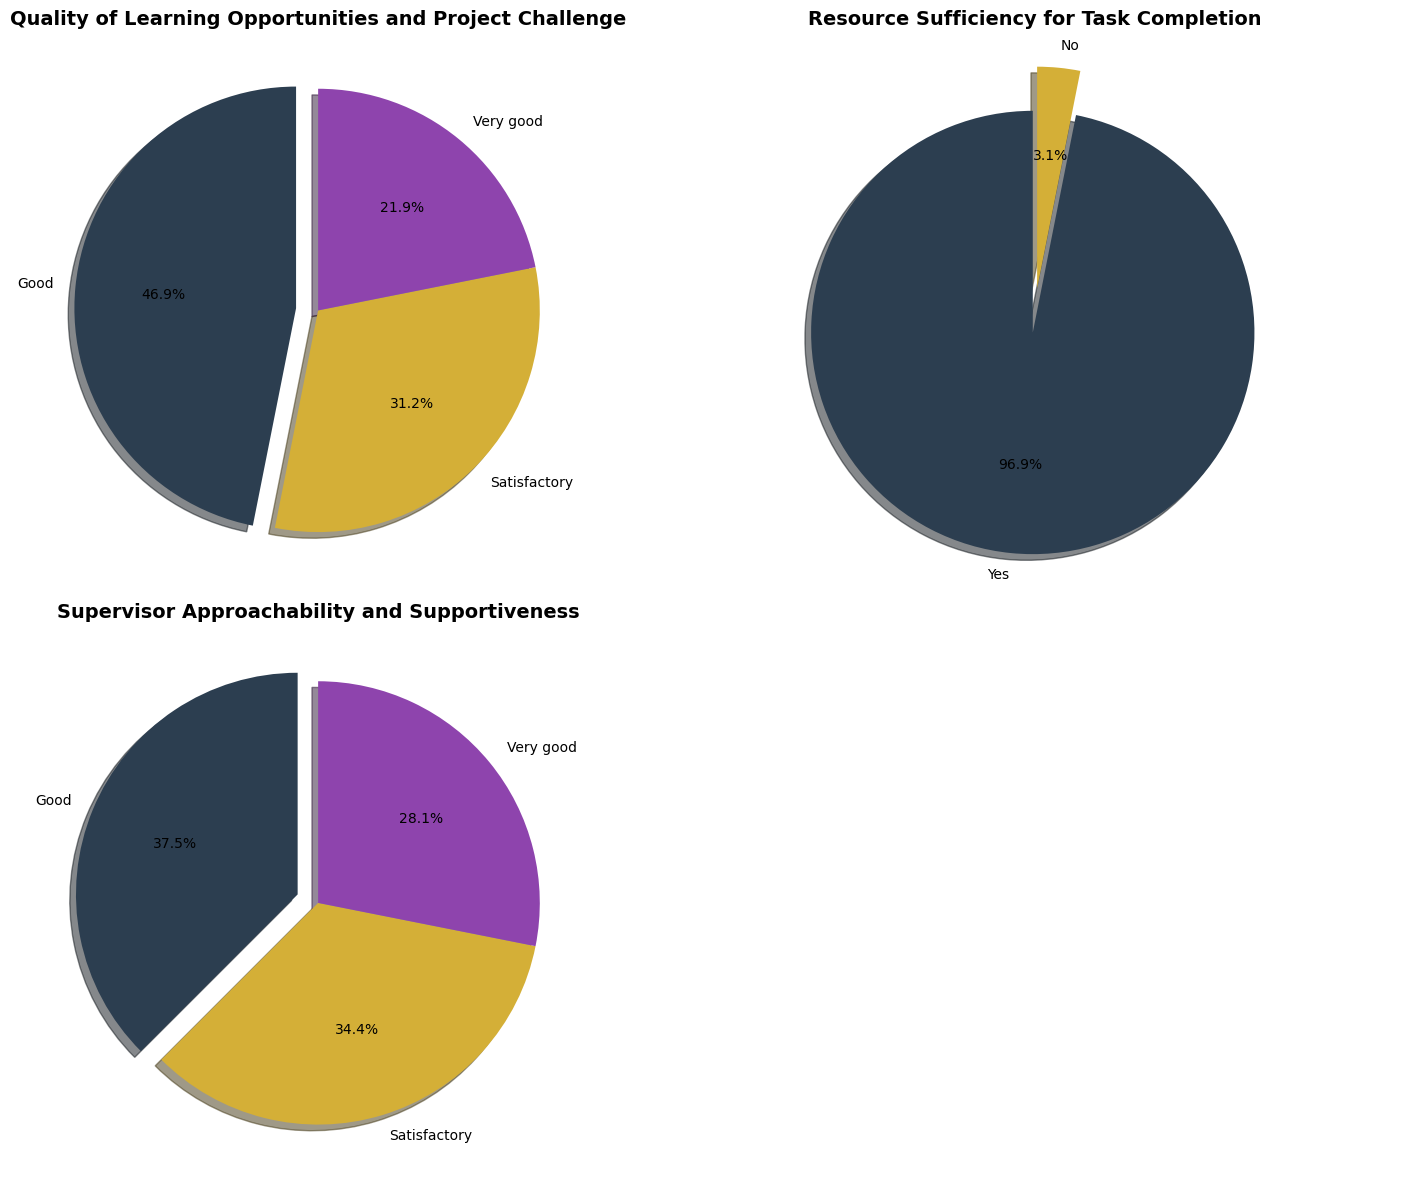

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

value_counts = df2['Intern_rating'].value_counts()
axes[0, 0].pie(value_counts,
               labels=value_counts.index,
               autopct='%1.1f%%',
               shadow=True,
               startangle=90,
               explode=[0.1] + [0] * (len(value_counts) - 1),
               colors=luxury_colors2[:len(value_counts)])
axes[0, 0].set_title('Quality of Learning Opportunities and Project Challenge', fontsize=14, fontweight='bold')

value_counts = df2['Sufficiency_of_resources'].value_counts()
axes[0, 1].pie(value_counts,
               labels=value_counts.index,
               autopct='%1.1f%%',
               shadow=True,
               startangle=90,
               explode=[0.1] * len(value_counts),
               colors=luxury_colors2[:len(value_counts)])
axes[0, 1].set_title('Resource Sufficiency for Task Completion', fontsize=14, fontweight='bold')

value_counts = df2['How approachable and supportive are the supervisors?'].value_counts()
axes[1, 0].pie(value_counts,
               labels=value_counts.index,
               autopct='%1.1f%%',
               shadow=True,
               startangle=90,
               explode=[0.1] + [0] * (len(value_counts) - 1),
               colors=luxury_colors2[:len(value_counts)])
axes[1, 0].set_title('Supervisor Approachability and Supportiveness', fontsize=14, fontweight='bold')

# Hide unused subplot (bottom-right)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


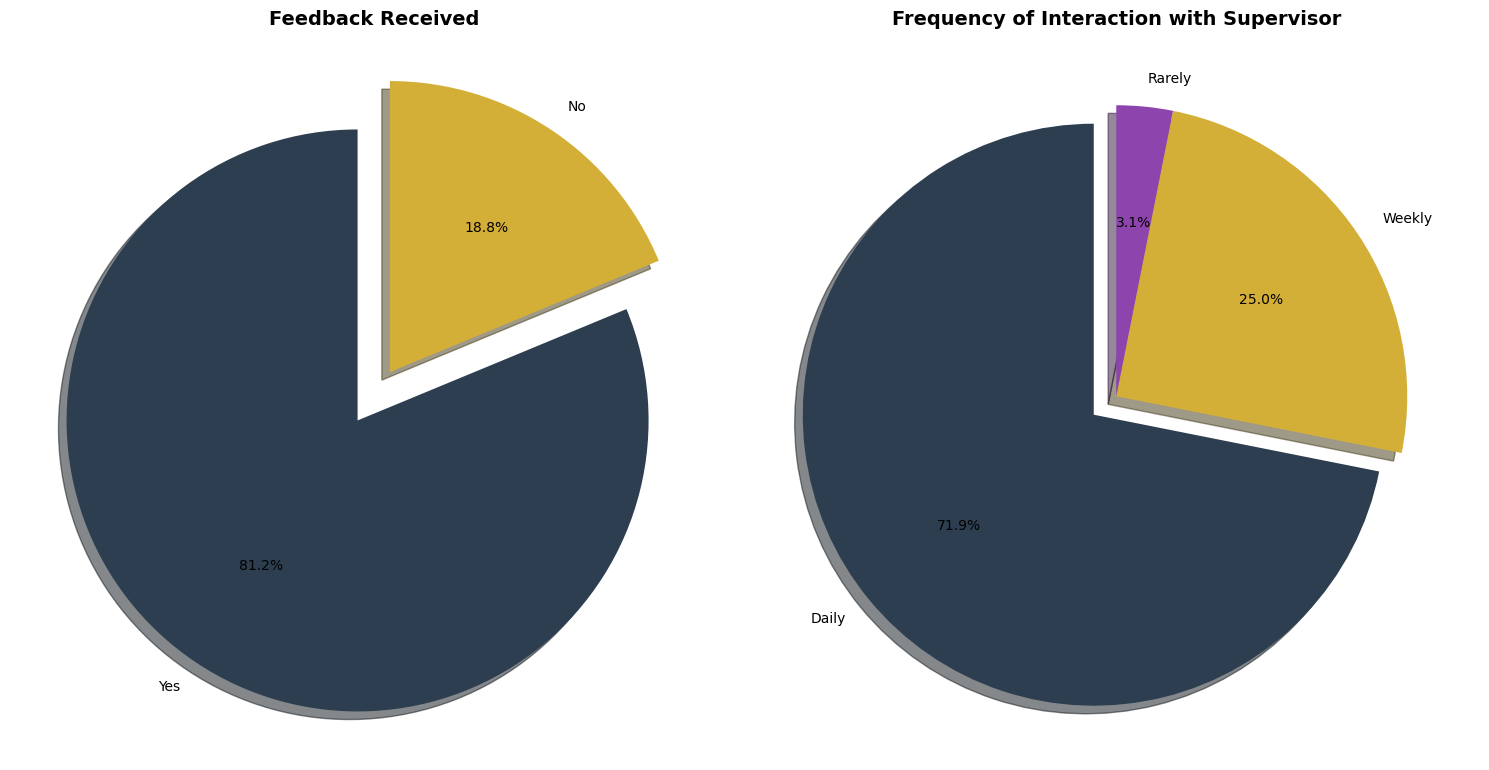

In [27]:

fig, axes = plt.subplots(1, 2, figsize=(15, 12))  

value_counts = df2['Did You receive timely and constructive feedback on your work?'].value_counts()
axes[0].pie(value_counts,
            labels=value_counts.index,
            autopct='%1.1f%%',
            shadow=True,
            startangle=90,
            explode=[0.1] * len(value_counts),  
            colors=luxury_colors2[:len(value_counts)])
axes[0].set_title('Feedback Received', fontsize=14, fontweight='bold')

value_counts = df2['freq_with_superv'].value_counts()
axes[1].pie(value_counts,
            labels=value_counts.index,
            autopct='%1.1f%%',
            shadow=True,
            startangle=90,
            explode=[0.1] + [0] * (len(value_counts) - 1), 
            colors=luxury_colors2[:len(value_counts)])
axes[1].set_title('Frequency of Interaction with Supervisor', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [28]:
university_duration = df1.groupby('School')['Internship_Duration'].mean().sort_values()
university_duration

School
HICM                       22.000000
COLTECH                    31.500000
ETHIST                     34.000000
University of Bamenda      38.000000
HIPDET                    130.000000
NAHPI                     154.222222
Name: Internship_Duration, dtype: float64

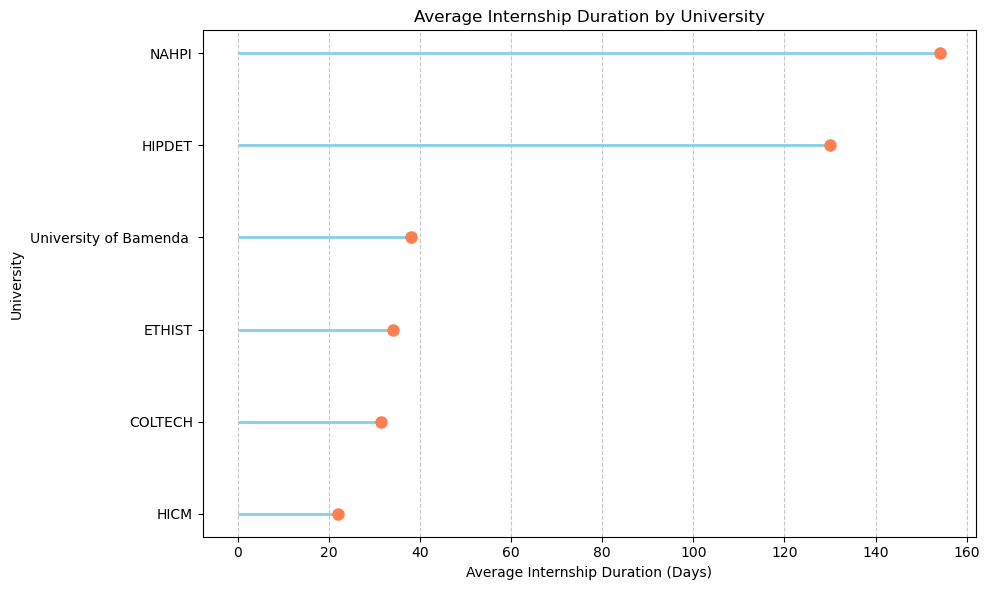

In [29]:
plt.figure(figsize=(10, 6))
plt.hlines(y=university_duration.index, xmin=0, xmax=university_duration.values, color='skyblue', linewidth=2)
plt.plot(university_duration.values, university_duration.index, "o", markersize=8, color='coral')
plt.xlabel("Average Internship Duration (Days)")
plt.ylabel("University")
plt.title("Average Internship Duration by University")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<font size = '15'>BILL

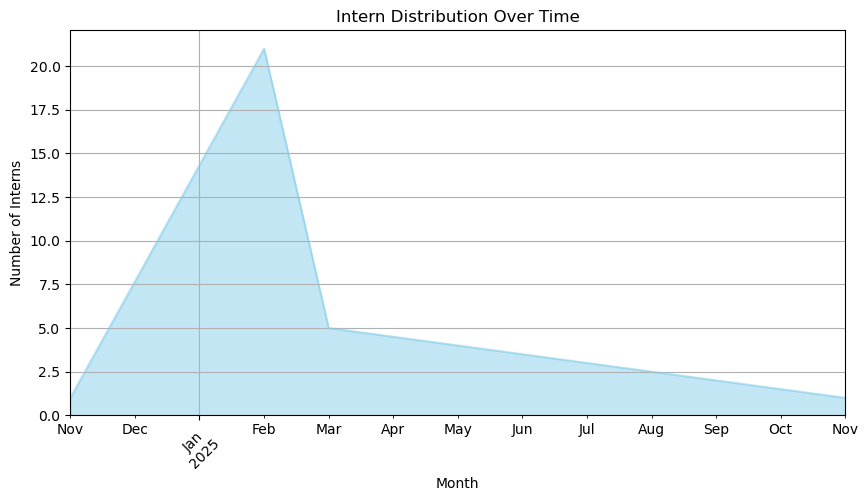

In [30]:
intern_distribution = df1.groupby(df1["Start Date"].dt.to_period("M")).size()
plt.figure(figsize=(10, 5))
intern_distribution.plot(kind='area', alpha=0.5, color='skyblue')
plt.title("Intern Distribution Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Interns")
plt.xticks(rotation=45)
plt.grid()
plt.show()

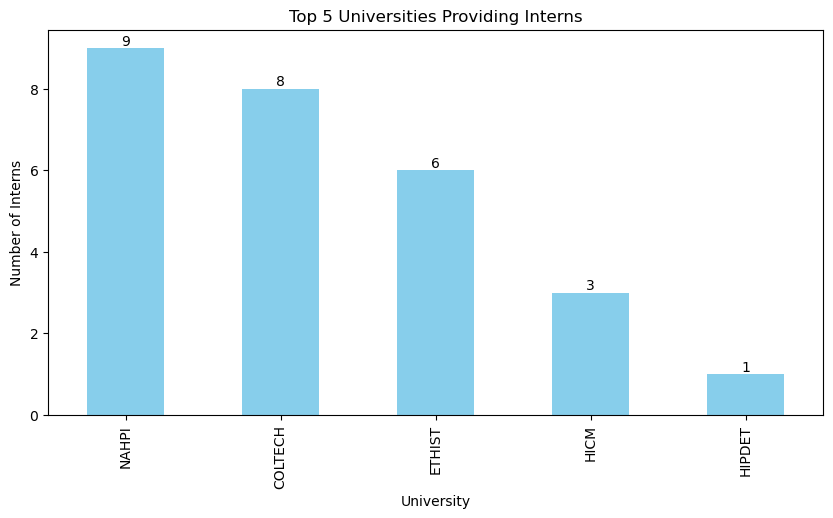

In [31]:
plt.figure(figsize=(10, 5))
top_universities = df1["School"].value_counts().head(5)
bars = top_universities.plot(kind="bar", color="skyblue")

for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             int(height), ha='center', va='bottom')
plt.title("Top 5 Universities Providing Interns")
plt.xlabel("University")
plt.ylabel("Number of Interns")
plt.show()

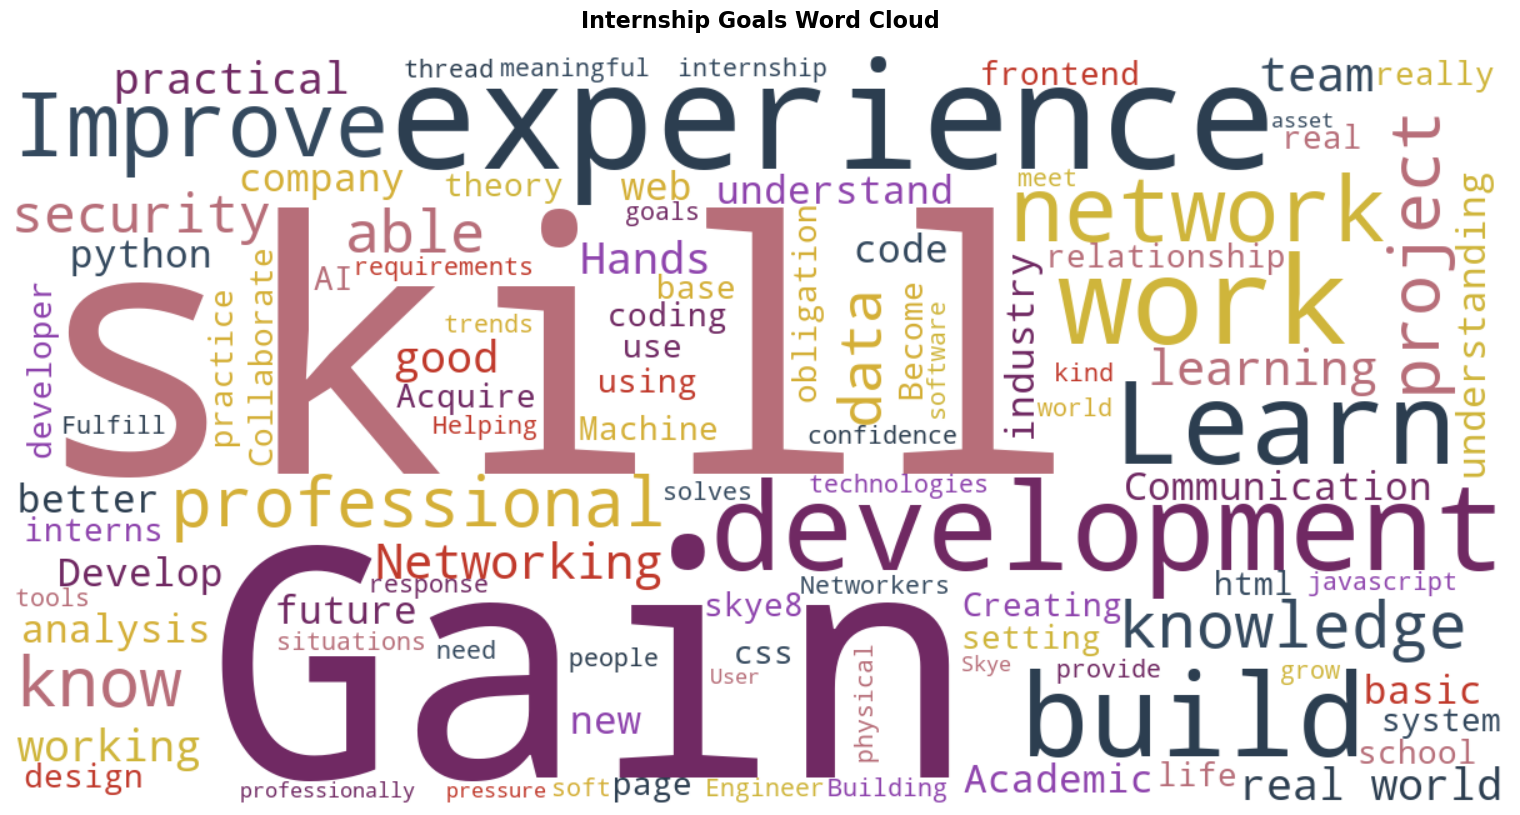

In [32]:

text = " ".join(str(goal) for goal in df1["Internship Goals"].dropna())

luxury_color_func = lambda *args, **kwargs: np.random.choice([
    '#2C3E50',  # Deep Navy Blue
    '#D4AF37',  # Metallic Gold
    '#8E44AD',  # Royal Purple
    '#C0392B',  # Burgundy Red
    '#B76E79',  # Rose Gold
    '#34495E',  # Charcoal Gray
    '#CFB53B',  # Old Gold
    '#702963'   # Amethyst
])

wordcloud = WordCloud(
    width=1200, 
    height=600, 
    background_color='white',
    color_func=luxury_color_func,
    max_words=100
).generate(text)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Internship Goals Word Cloud', pad=20, fontsize=16, fontweight='bold')
plt.tight_layout(pad=0)
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_7640\736277612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1["Stack"], y=df1["Internship_Duration"], palette="coolwarm")


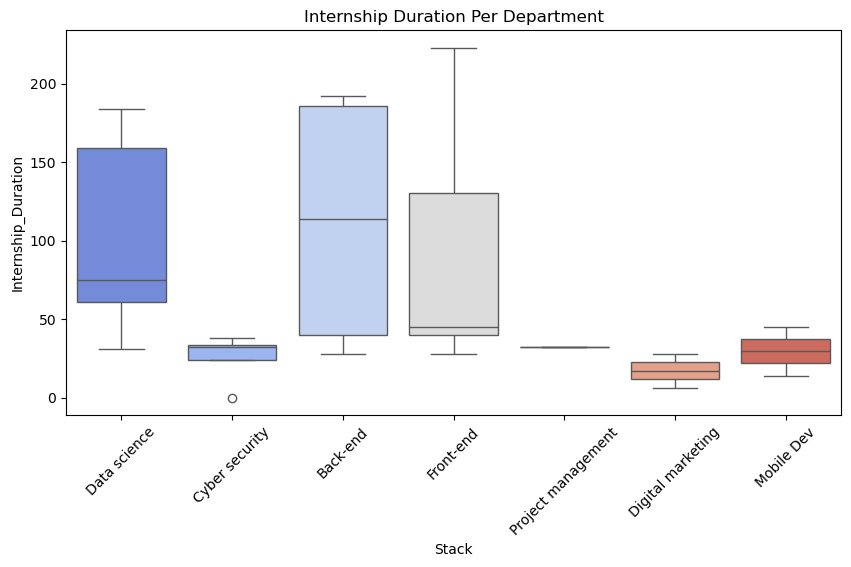

In [33]:
# Internship duration per department (boxplot)
plt.figure(figsize=(10,5))
sns.boxplot(x=df1["Stack"], y=df1["Internship_Duration"], palette="coolwarm")
plt.title("Internship Duration Per Department")
plt.xticks(rotation=45)
plt.show()

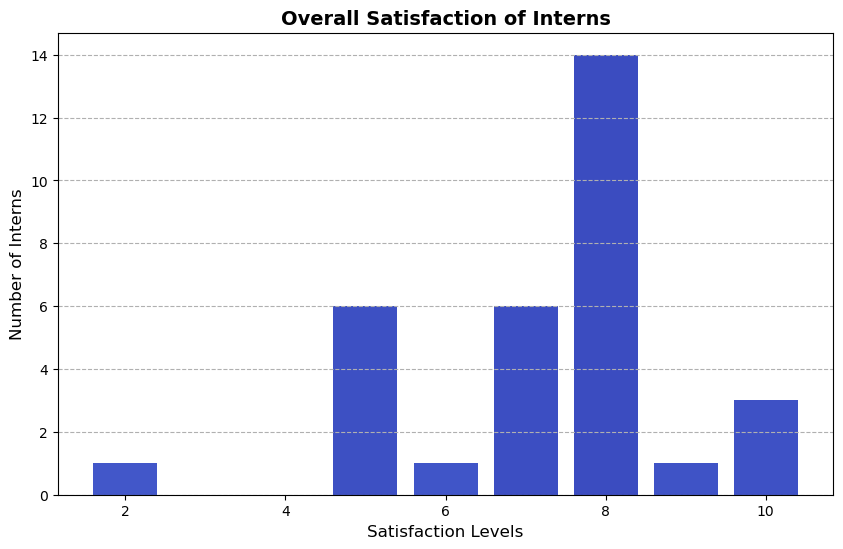

In [60]:

value_counts = df2['how_satified_are_interns'].value_counts()

plt.figure(figsize=(10, 6))

colors = plt.cm.coolwarm(range(len(value_counts)))
plt.bar(value_counts.index, value_counts.values, color=colors)

plt.xlabel('Satisfaction Levels', fontsize=12)
plt.ylabel('Number of Interns', fontsize=12)
plt.title('Overall Satisfaction of Interns', fontsize=14, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()
